In [16]:
# Data sederhana
age = [15, 18, 21, 25, 30, 35]  # input (X)
watch_hours = [2, 3, 3.5, 4, 4.5, 5]  # output (Y)

# Langkah 1: Hitung mean X dan Y
mean_x = sum(age) / len(age)
mean_y = sum(watch_hours) / len(watch_hours)

# Langkah 2: Hitung slope (w)
numerator = sum((x - mean_x)*(y - mean_y) for x, y in zip(age, watch_hours))
denominator = sum((x - mean_x)**2 for x in age)
w = numerator / denominator

# Langkah 3: Hitung bias (b)
b = mean_y - w * mean_x

# Prediksi jam nonton user usia 28
x_pred = 28
y_pred = w * x_pred + b

print(f"Model: y = {w:.2f} * x + {b:.2f}")
print(f"Prediksi jam nonton untuk usia 28 tahun: {y_pred:.2f} jam")


Model: y = 0.14 * x + 0.33
Prediksi jam nonton untuk usia 28 tahun: 4.22 jam


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = {
    "IQ": [100, 110, 90, 105, 100, 100, 102, 100, 101, 121, 97, 98],
    "Nilai": [92, 86, 78, 82, 81, 81, 81, 81, 81, 88, 52, 55]
}

df_awal = pd.DataFrame(data)

In [3]:
df_awal

,IQ,Nilai
0,100,92
1,110,86
2,90,78
3,105,82
4,100,81
5,100,81
6,102,81
7,100,81
8,101,81
9,121,88


In [4]:
df_awal.shape

(12, 2)

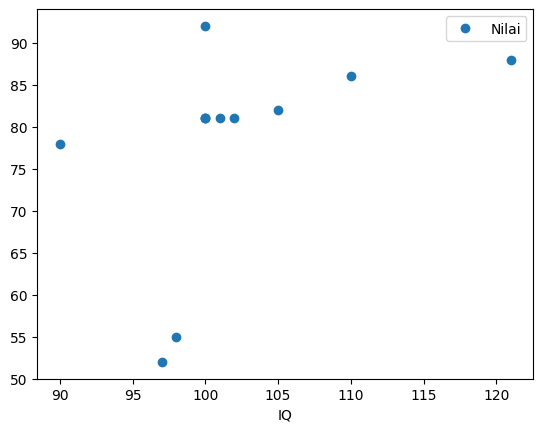

In [ ]:
df_awal.plot(x='IQ', y="Nilai", style='o')
plt.show()

In [6]:
x = df_awal.iloc[:, :-1].values
y = df_awal.iloc[:, 1].values

In [7]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
regresor = LinearRegression()
regresor.fit(X_train, Y_train)

LinearRegression()

In [9]:
print(regresor.intercept_)

23.018155410312282


In [10]:
print(regresor.coef_)

[0.55610022]


In [11]:
# test model
y_pred = regresor.predict(X_test)

In [12]:
df = pd.DataFrame({"Actual": Y_test, "Predict": y_pred})
df

,Actual,Predict
0,81,79.740378
1,55,77.515977
2,81,78.628177


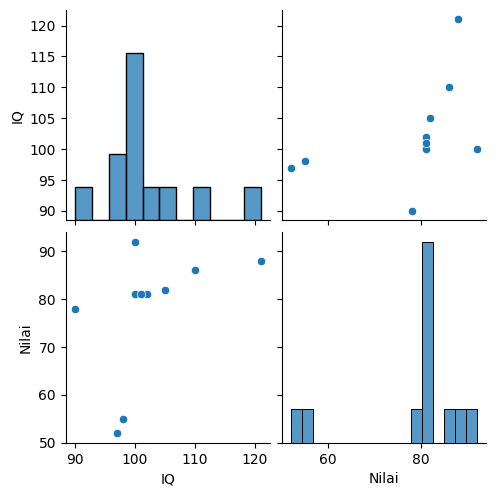

In [13]:
sns.pairplot(df_awal)

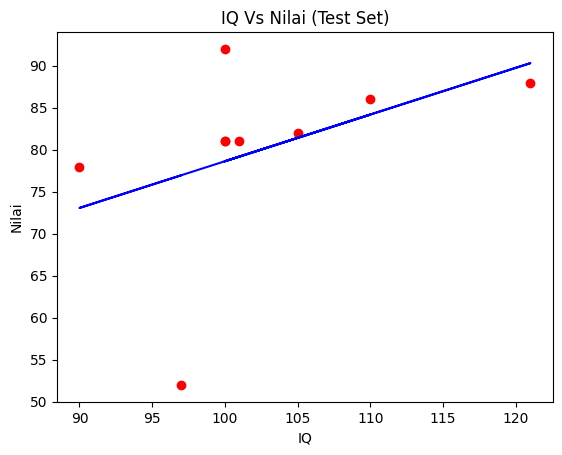

In [14]:
# tampilkan hasil regresi dalam garis
plt.scatter(X_train, Y_train, color="r")
plt.plot(X_train, regresor.predict(X_train), color='b')
plt.title("IQ Vs Nilai (Test Set)")
plt.xlabel("IQ")
plt.ylabel("Nilai")
plt.show()

''